In [77]:
import matplotlib
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
import sqldf
from sklearn.pipeline import Pipeline
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, load_sample_images

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from tensorflow import keras
    
%load_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
import scipy

In [79]:
import xlrd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [80]:
df = pd.read_csv('customer_churn_dataset-training-master.csv')

df2 = pd.read_csv('customer_churn_dataset-testing-master.csv')

In [81]:
df = df.append(df2)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505207 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


In [83]:
len(df)

505207

In [84]:
df['Churn'].value_counts()
#pretty decent split

1.0    280492
0.0    224714
Name: Churn, dtype: int64

In [85]:
#making buckets for tenure
max(df['Tenure'])

60.0

In [86]:
def get_tenure_group(Tenure):
    if Tenure < 24:
        return 'New'
    elif Tenure >= 24 and Tenure < 48:
        return 'Intermediate'
    else:
        return 'Long Term'

In [87]:
df['Tenure_Group'] = df['Tenure'].apply(get_tenure_group)

In [88]:
df['Tenure_Group'].value_counts()


Intermediate    209979
New             179990
Long Term       115238
Name: Tenure_Group, dtype: int64

In [89]:
#EDA
query = """
SELECT Tenure_Group, COUNT(Tenure_Group) Amount
FROM df
GROUP BY Tenure_Group
ORDER BY Amount DESC
LIMIT 100
"""


In [90]:
df_view = sqldf.run(query)
df_view

,Tenure_Group,Amount
0,Intermediate,209979
1,New,179990
2,Long Term,115238


In [91]:
df['Usage Frequency'].value_counts()

11.0    17387
29.0    17383
21.0    17353
25.0    17328
12.0    17303
30.0    17303
19.0    17300
20.0    17286
26.0    17223
10.0    17184
27.0    17183
23.0    17168
14.0    17164
15.0    17151
13.0    17143
17.0    17127
22.0    17098
24.0    17071
28.0    17052
16.0    17039
18.0    16908
1.0     16412
3.0     16331
2.0     16266
5.0     16053
4.0     15976
9.0     15834
6.0     15818
8.0     15741
7.0     15621
Name: Usage Frequency, dtype: int64

In [92]:
def get_usage_group(Usage_Frequency):
    if Usage_Frequency < 10:
        return 'Low'
    elif Usage_Frequency >= 10 and Usage_Frequency < 20:
        return 'Medium'
    else:
        return 'High'

In [93]:
df['Usage_Group'] = df['Usage Frequency'].apply(get_usage_group)

In [94]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Tenure_Group,Usage_Group
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,Intermediate,Medium
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,Long Term,Low
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,New,Low
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,Intermediate,High
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,Intermediate,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,Intermediate,Medium
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,New,Low
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0,Intermediate,Medium
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0,New,Medium


In [95]:
df['Support Calls'].value_counts()

0.0     74842
1.0     74405
2.0     71383
3.0     57452
4.0     43898
5.0     31575
10.0    30487
7.0     30469
9.0     30294
8.0     30208
6.0     30193
Name: Support Calls, dtype: int64

In [96]:
def get_support_group(support):
    if support < 3:
        return 'Low'
    elif support >= 3 and support < 5:
        return 'Medium'
    else:
        return 'High'

In [97]:
df['Support_Group'] = df['Support Calls'].apply(get_support_group)

In [98]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Tenure_Group,Usage_Group,Support_Group
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,Intermediate,Medium,High
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,Long Term,Low,High
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,New,Low,High
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,Intermediate,High,High
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,Intermediate,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,Intermediate,Medium,High
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,New,Low,High
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0,Intermediate,Medium,High
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0,New,Medium,High


In [99]:
df['Payment Delay'].value_counts()

20.0    19455
16.0    19384
18.0    19311
17.0    19206
19.0    19153
12.0    18785
11.0    18774
13.0    18703
10.0    18697
14.0    18696
15.0    18601
3.0     18568
7.0     18566
1.0     18560
4.0     18526
0.0     18498
6.0     18495
8.0     18451
9.0     18403
2.0     18353
5.0     18312
21.0    11436
30.0    11364
22.0    11275
29.0    11194
26.0    11164
25.0    11143
24.0    11073
23.0    11039
28.0    11025
27.0    10996
Name: Payment Delay, dtype: int64

In [100]:
def get_delay_group(delay):
    if delay < 1:
        return 'No Delay'
    else:
        return 'Delay'

In [101]:
df['Delay'] = df['Payment Delay'].apply(get_delay_group)

In [102]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Tenure_Group,Usage_Group,Support_Group,Delay
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,Intermediate,Medium,High,Delay
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,Long Term,Low,High,Delay
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,New,Low,High,Delay
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,Intermediate,High,High,Delay
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,Intermediate,High,High,Delay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,Intermediate,Medium,High,Delay
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,New,Low,High,Delay
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0,Intermediate,Medium,High,Delay
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0,New,Medium,High,Delay


In [103]:
df['Total Spend'].median()

648.9

In [104]:
def get_pay_group(pay):
    if pay < 250:
        return 'Low'
    elif pay >= 250 and pay < 750:
        return 'Medium'
    else:
        return 'High'

In [105]:
df['Pay_Group'] = df['Total Spend'].apply(get_pay_group)

In [106]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Tenure_Group,Usage_Group,Support_Group,Delay,Pay_Group
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,Intermediate,Medium,High,Delay,High
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,Long Term,Low,High,Delay,Medium
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,New,Low,High,Delay,Low
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,Intermediate,High,High,Delay,Medium
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,Intermediate,High,High,Delay,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,Intermediate,Medium,High,Delay,High
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,New,Low,High,Delay,High
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0,Intermediate,Medium,High,Delay,Medium
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0,New,Medium,High,Delay,Medium


In [107]:
df['Last Interaction'].value_counts()

7.0     19205
8.0     18972
14.0    18914
15.0    18907
6.0     18904
3.0     18873
1.0     18843
12.0    18840
10.0    18819
13.0    18800
5.0     18797
2.0     18781
11.0    18703
4.0     18628
9.0     18620
16.0    14990
24.0    14984
26.0    14976
27.0    14935
19.0    14913
30.0    14860
22.0    14849
28.0    14810
20.0    14808
21.0    14805
18.0    14772
25.0    14748
23.0    14738
29.0    14716
17.0    14696
Name: Last Interaction, dtype: int64

In [108]:
def get_inter_group(inter):
    if inter < 15:
        return 'Recent'

    else:
        return 'Not Recent'

In [109]:
df['Interaction_group'] = df['Last Interaction'].apply(get_inter_group)

In [110]:
df['Age'].value_counts()

50.0    14787
42.0    13873
47.0    13755
44.0    13658
43.0    13651
46.0    13647
49.0    13641
48.0    13632
40.0    13613
41.0    13608
45.0    13546
38.0    12470
36.0    12436
31.0    12432
37.0    12391
35.0    12353
39.0    12310
33.0    12247
30.0    12231
34.0    12171
32.0    12169
25.0    10995
26.0    10973
20.0    10941
22.0    10905
29.0    10901
28.0    10886
21.0    10825
23.0    10798
27.0    10787
24.0    10717
18.0     9493
19.0     9352
63.0     7033
55.0     6975
53.0     6949
65.0     6934
59.0     6903
54.0     6894
64.0     6891
56.0     6869
52.0     6839
60.0     6832
58.0     6822
61.0     6821
51.0     6803
57.0     6762
62.0     6685
Name: Age, dtype: int64

In [111]:
def get_age_group(age):
    if age < 25:
        return 'Young'
    elif age >= 25 and age < 40:
        return 'Middle'
    else:
        return 'Old'

In [112]:
df['Age_group'] = df['Age'].apply(get_age_group)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Tenure_Group,Usage_Group,Support_Group,Delay,Pay_Group,Interaction_group,Age_group
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,Intermediate,Medium,High,Delay,High,Not Recent,Middle
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,Long Term,Low,High,Delay,Medium,Recent,Old
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,New,Low,High,Delay,Low,Recent,Old
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,Intermediate,High,High,Delay,Medium,Not Recent,Old
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,Intermediate,High,High,Delay,Medium,Not Recent,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,Intermediate,Medium,High,Delay,High,Recent,Old
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,New,Low,High,Delay,High,Recent,Middle
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0,Intermediate,Medium,High,Delay,Medium,Not Recent,Middle
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0,New,Medium,High,Delay,Medium,Recent,Old


In [176]:
def get_contract_group(contract):
    if contract == 'Monthly':
        return 'Monthly'
    elif contract =='Quarterly':
        return 'Quarterly'
    else:
        return 'Annually'

In [178]:
df['Sub_Group'] = df['Contract Length'].apply(get_contract_group)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Tenure_Group,Usage_Group,Support_Group,Delay,Pay_Group,Interaction_group,Age_group,Sub_Group
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,Intermediate,Medium,High,Delay,High,Not Recent,Middle,Annually
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,Long Term,Low,High,Delay,Medium,Recent,Old,Monthly
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,New,Low,High,Delay,Low,Recent,Old,Quarterly
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,Intermediate,High,High,Delay,Medium,Not Recent,Old,Monthly
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,Intermediate,High,High,Delay,Medium,Not Recent,Young,Monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,Intermediate,Medium,High,Delay,High,Recent,Old,Quarterly
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,New,Low,High,Delay,High,Recent,Middle,Annually
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0,Intermediate,Medium,High,Delay,Medium,Not Recent,Middle,Monthly
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0,New,Medium,High,Delay,Medium,Recent,Old,Monthly


In [113]:
df_cleaned = df

df_cleaned

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Tenure_Group,Usage_Group,Support_Group,Delay,Pay_Group,Interaction_group,Age_group
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,Intermediate,Medium,High,Delay,High,Not Recent,Middle
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,Long Term,Low,High,Delay,Medium,Recent,Old
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,New,Low,High,Delay,Low,Recent,Old
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,Intermediate,High,High,Delay,Medium,Not Recent,Old
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,Intermediate,High,High,Delay,Medium,Not Recent,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,Intermediate,Medium,High,Delay,High,Recent,Old
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,New,Low,High,Delay,High,Recent,Middle
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0,Intermediate,Medium,High,Delay,Medium,Not Recent,Middle
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0,New,Medium,High,Delay,Medium,Recent,Old


In [114]:
X_Train_df=df_cleaned.drop(columns = ['Churn', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction'])
X_Train_df

,CustomerID,Gender,Subscription Type,Contract Length,Tenure_Group,Usage_Group,Support_Group,Delay,Pay_Group,Interaction_group,Age_group
0,2.0,Female,Standard,Annual,Intermediate,Medium,High,Delay,High,Not Recent,Middle
1,3.0,Female,Basic,Monthly,Long Term,Low,High,Delay,Medium,Recent,Old
2,4.0,Female,Basic,Quarterly,New,Low,High,Delay,Low,Recent,Old
3,5.0,Male,Standard,Monthly,Intermediate,High,High,Delay,Medium,Not Recent,Old
4,6.0,Male,Basic,Monthly,Intermediate,High,High,Delay,Medium,Not Recent,Young
...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,Female,Basic,Quarterly,Intermediate,Medium,High,Delay,High,Recent,Old
64370,64371.0,Male,Standard,Annual,New,Low,High,Delay,High,Recent,Middle
64371,64372.0,Male,Premium,Monthly,Intermediate,Medium,High,Delay,Medium,Not Recent,Middle
64372,64373.0,Female,Standard,Monthly,New,Medium,High,Delay,Medium,Recent,Old


In [115]:
X_Train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505207 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Gender             505206 non-null  object 
 2   Subscription Type  505206 non-null  object 
 3   Contract Length    505206 non-null  object 
 4   Tenure_Group       505207 non-null  object 
 5   Usage_Group        505207 non-null  object 
 6   Support_Group      505207 non-null  object 
 7   Delay              505207 non-null  object 
 8   Pay_Group          505207 non-null  object 
 9   Interaction_group  505207 non-null  object 
 10  Age_group          505207 non-null  object 
dtypes: float64(1), object(10)
memory usage: 46.3+ MB


In [116]:
null_data = df[df.isnull().any(axis=1)]
null_data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Tenure_Group,Usage_Group,Support_Group,Delay,Pay_Group,Interaction_group,Age_group
199295,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,Long Term,High,High,Delay,High,Not Recent,Old


In [117]:
X_Train_df = X_Train_df.drop(199295)

In [122]:
#one hot encoding categorical features

ohe = OneHotEncoder(drop='first')
dummies = ohe.fit_transform(X_Train_df[['Gender','Subscription Type','Contract Length', 'Tenure_Group', 'Usage_Group','Support_Group','Delay', 'Pay_Group','Interaction_group','Age_group']])

# Getting a DF
df_onehot = pd.DataFrame(dummies.todense(), columns=ohe.get_feature_names(), index=X_Train_df.index)
df_sparse = scipy.sparse.csr_matrix(pd.get_dummies(df_onehot).values)
df_sparse

<505206x17 sparse matrix of type '<class 'numpy.float64'>'
	with 2795577 stored elements in Compressed Sparse Row format>

In [124]:
from scipy import sparse
sparse.save_npz("churn_sparse.npz", df_sparse)

In [46]:
X_Train_df = df_onehot

In [47]:
df=df.drop(199295)

In [48]:
y = df['Churn']
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
64369    1.0
64370    1.0
64371    1.0
64372    1.0
64373    1.0
Name: Churn, Length: 505206, dtype: float64

In [65]:
X_Train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505206 entries, 0 to 64373
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   x0_Male       505206 non-null  float64
 1   x1_Premium    505206 non-null  float64
 2   x1_Standard   505206 non-null  float64
 3   x2_Monthly    505206 non-null  float64
 4   x2_Quarterly  505206 non-null  float64
 5   x3_Long Term  505206 non-null  float64
 6   x3_New        505206 non-null  float64
 7   x4_Low        505206 non-null  float64
 8   x4_Medium     505206 non-null  float64
 9   x5_Low        505206 non-null  float64
 10  x5_Medium     505206 non-null  float64
 11  x6_No Delay   505206 non-null  float64
 12  x7_Low        505206 non-null  float64
 13  x7_Medium     505206 non-null  float64
 14  x8_Recent     505206 non-null  float64
 15  x9_Old        505206 non-null  float64
 16  x9_Young      505206 non-null  float64
dtypes: float64(17)
memory usage: 69.4 MB


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_Train_df, y, test_size = 0.3)

In [50]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

In [51]:
lr1.score(X_train, y_train)

0.42098764464538196

In [52]:
logreg_clf = LogisticRegression()

In [53]:
logreg_clf.fit(X_train, y_train)

LogisticRegression()

In [54]:
logreg_clf.score(X_train, y_train)

0.8452624673400368

In [55]:
weights = logreg_clf.coef_.tolist()
weight_values = weights[0]
weight_values

[-0.7743538144117199,
 -0.07453674754829992,
 -0.06757604267076021,
 2.1879216168991036,
 -0.010129432210195232,
 -0.02119035345596341,
 0.04794021352323949,
 0.28791023541970723,
 0.00659785788310219,
 -2.9966748439755557,
 -2.383845142922258,
 -0.4638010137762825,
 2.3361860806225514,
 0.601911523005552,
 -0.6249471103847347,
 0.36195928788099907,
 0.29202916017586866]

In [56]:
column_headers = X_train.columns.values.tolist()

tuples = [(key, value)
          for i, (key, value) in enumerate(zip(column_headers, weight_values))]
res = dict(tuples)

print(res)

{'x0_Male': -0.7743538144117199, 'x1_Premium': -0.07453674754829992, 'x1_Standard': -0.06757604267076021, 'x2_Monthly': 2.1879216168991036, 'x2_Quarterly': -0.010129432210195232, 'x3_Long Term': -0.02119035345596341, 'x3_New': 0.04794021352323949, 'x4_Low': 0.28791023541970723, 'x4_Medium': 0.00659785788310219, 'x5_Low': -2.9966748439755557, 'x5_Medium': -2.383845142922258, 'x6_No Delay': -0.4638010137762825, 'x7_Low': 2.3361860806225514, 'x7_Medium': 0.601911523005552, 'x8_Recent': -0.6249471103847347, 'x9_Old': 0.36195928788099907, 'x9_Young': 0.29202916017586866}


In [57]:
#looking at important features

keys = list(res.keys())
values = list(res.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
sorted_dict

{'x5_Low': -2.9966748439755557,
 'x5_Medium': -2.383845142922258,
 'x0_Male': -0.7743538144117199,
 'x8_Recent': -0.6249471103847347,
 'x6_No Delay': -0.4638010137762825,
 'x1_Premium': -0.07453674754829992,
 'x1_Standard': -0.06757604267076021,
 'x3_Long Term': -0.02119035345596341,
 'x2_Quarterly': -0.010129432210195232,
 'x4_Medium': 0.00659785788310219,
 'x3_New': 0.04794021352323949,
 'x4_Low': 0.28791023541970723,
 'x9_Young': 0.29202916017586866,
 'x9_Old': 0.36195928788099907,
 'x7_Medium': 0.601911523005552,
 'x2_Monthly': 2.1879216168991036,
 'x7_Low': 2.3361860806225514}

In [58]:
#Making Decision Tree

tree_clf = DecisionTreeClassifier(criterion = 'gini', random_state=42)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [131]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, splitter = 'best' , random_state=42, min_samples_split=3, \
                                 min_samples_leaf=3)
tree_clf.fit(X_train, y_train)

# Accuracy on training data & test data
print('Training:', tree_clf.score(X_train, y_train))
print('Testing:', tree_clf.score(X_test, y_test))


Training: 0.8662779518385721
Testing: 0.8658700729734367


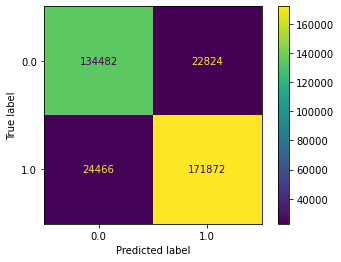

In [146]:

plot_confusion_matrix(tree_clf, X_train, y_train)

In [149]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

y_pred = tree_clf.predict(X_test)
DT_ps=precision_score(y_test, y_pred)
DT_rs=recall_score(y_test, y_pred)
DT_f1 = f1_score(y_pred, y_test)

In [150]:
#precision score
DT_ps

0.8822909304359284

In [151]:
#recall score
DT_rs

0.875193098367279

In [152]:
#f1 score
DT_f1

0.8787276816340653

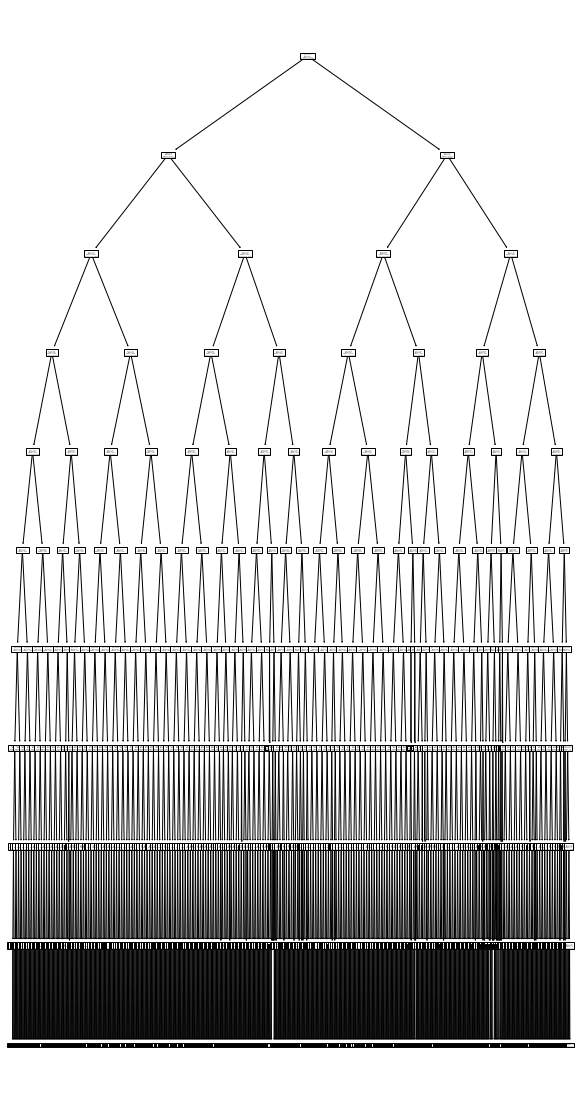

In [136]:
f, ax = plt.subplots(figsize=(10, 20))
plot_tree(tree_clf, ax=ax);

In [140]:
dt = DecisionTreeClassifier(random_state=42)
feature_used = X_train.columns
dt.fit(X_train, y_train)

for fi, feature in zip(dt.feature_importances_, feature_used):
    print(fi, feature)

0.01861523588428754 x0_Male
0.0032642722019758643 x1_Premium
0.00394239250398279 x1_Standard
0.21204125754224643 x2_Monthly
0.003204838417231523 x2_Quarterly
0.0028225432842733126 x3_Long Term
0.00643127744693336 x3_New
0.004944366954674326 x4_Low
0.002669644756324841 x4_Medium
0.34656767641764014 x5_Low
0.176107277916588 x5_Medium
0.00296564474672504 x6_No Delay
0.09016665631696023 x7_Low
0.014898658065238947 x7_Medium
0.07464611618647111 x8_Recent
0.01590789338192397 x9_Old
0.020804247976522576 x9_Young


In [144]:
#getting the 5 biggest features

sorted_index_array = np.argsort(dt.feature_importances_) 
  

sorted_array = dt.feature_importances_[sorted_index_array] 

n = 5

rslt = sorted_array[ -n: ] 
Names = ["Last Contact: Recent", "Pay Group: Low", "Support Group: Medium", "Subscription Type: Monthly", "Support Group: Low"]
# show the output 

rslt=rslt.tolist()
rslt

[0.07464611618647111,
 0.09016665631696023,
 0.176107277916588,
 0.21204125754224643,
 0.34656767641764014]

In [145]:


Largest_dict = dict(zip(Names, rslt))


graph_df=pd.DataFrame(data=Largest_dict, columns=['Features', 'Weights'])

graph_df['Features'] = Names
graph_df['Weights'] = rslt
graph_df

,Features,Weights
0,Last Contact: Recent,0.074646
1,Pay Group: Low,0.090167
2,Support Group: Medium,0.176107
3,Subscription Type: Monthly,0.212041
4,Support Group: Low,0.346568


<AxesSubplot:xlabel='Delay', ylabel='Count'>

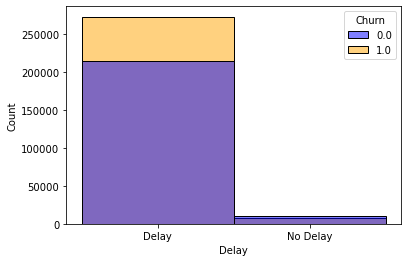

In [180]:
sns.histplot(data=df, x=df['Delay'], hue='Churn', palette=['blue', 'orange'])

<AxesSubplot:xlabel='Pay_Group', ylabel='Count'>

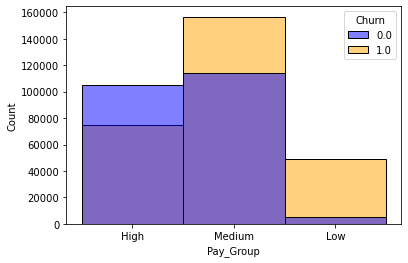

In [173]:
import seaborn as sns

sns.histplot(data=df, x=df['Pay_Group'], hue='Churn', palette=['blue', 'orange'])

<AxesSubplot:xlabel='Support Calls', ylabel='Count'>

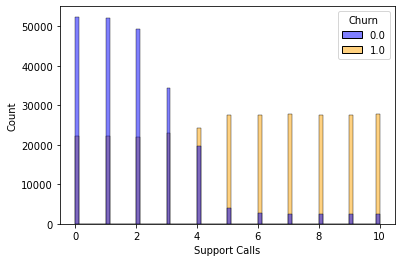

In [166]:
sns.histplot(data=df, x='Support Calls', hue='Churn', palette=['blue', 'orange'])

In [60]:
bag_class_decision = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 150)
bag_pipe = Pipeline([('model',bag_class_decision)])
params = {'model__base_estimator__max_depth': np.arange(4,28,4)
         }
cv = GridSearchCV(estimator = bag_pipe, param_grid = params, cv = 5)

In [125]:
#cv.fit(X_train, y_train)

In [ ]:
best_model = cv.best_estimator_
cv.best_params_

In [ ]:
cv.best_score_

In [ ]:
rf_pipe = Pipeline([('model', RandomForestClassifier(n_estimators = 100))])

In [ ]:
rf_params = {'model__n_estimators': [50, 100, 200, 500] ,
             'model__min_samples_leaf': [1,3,5,7]}
rf_cv = GridSearchCV(estimator = rf_pipe, param_grid = rf_params, cv = 5)
rf_cv.fit(X_train, y_train)

In [ ]:
rf_cv.best_score_

In [ ]:
best_rf_model = rf_cv.best_estimator_
best_rf_model

In [ ]:
#best_rf_model.fit(X_train, y_train)

In [ ]:
#y_rfcv_pred = best_rf_model.predict(X_test)
#print(classification_report(y_test,y_rfcv_pred))

In [62]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [70]:
model = Sequential()

#model.add(Flatten(input_shape=(17,)))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.1)) 
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation ='sigmoid'))


model.compile(optimizer=opt, loss='binary_crossentropy',
              metrics=['accuracy'])

In [71]:
# will take a while
Output = model.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

8842/8842 [==============================] - 15s 2ms/step - loss: 0.3849 - accuracy: 0.8581 - val_loss: 0.3658 - val_accuracy: 0.8672
Epoch 2/10
8842/8842 [==============================] - 15s 2ms/step - loss: 0.3738 - accuracy: 0.8638 - val_loss: 0.3661 - val_accuracy: 0.8671
Epoch 3/10
8842/8842 [==============================] - 15s 2ms/step - loss: 0.3723 - accuracy: 0.8640 - val_loss: 0.3645 - val_accuracy: 0.8670
Epoch 4/10
8842/8842 [==============================] - 15s 2ms/step - lo

In [153]:
plot_confusion_matrix(Output, X_train, y_train)

ValueError: plot_confusion_matrix only supports classifiers